In [1]:
import os
os.environ['HSA_OVERRIDE_GFX_VERSION'] = '10.3.0'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from accuracy import calc_PLCC, calc_SRCC, calc_CosineSim, calc_MAE
import matplotlib.pyplot as plt
import torch
from scipy import stats

In [4]:
import csv
import pandas as pd

pred: [52.92722778320312, 31.77111484527588, 79.4442514038086, 88.42845825195313, 65.3324949645996, 73.5579295349121, 113.7228173828125, 108.2521987915039, 88.97753601074218, 80.75233581542969, 84.2205125427246, 82.22249557495117, 72.8276203918457, 70.09846870422363, 89.44258712768554, 77.73785873413085, 94.24209091186523, 103.70142608642578, 95.7509587097168, 78.2849919128418, 90.4970442199707, 97.5058122253418, 77.60875366210938, 98.3733203125, 94.28892700195313, 105.90901275634764, 40.71688354492188, 84.69989395141602, 79.43844375610351, 88.84664901733399, 75.4779499053955, 54.324364776611326, 86.58404083251953, 55.05653472900391, 91.33505584716796, 88.34092208862305, 81.81863616943359, 84.28825561523438, 61.53705612182617, 71.12177101135254, 40.74013298034668, 85.27337417602538, 76.19595764160157, 86.79191528320312, 43.075331649780274, 96.759630279541, 92.6827410888672, 41.06036197662353, 85.26090545654297, 58.342535247802736, 6.891525899171829, 87.6400390625, 109.3144645690918, 35

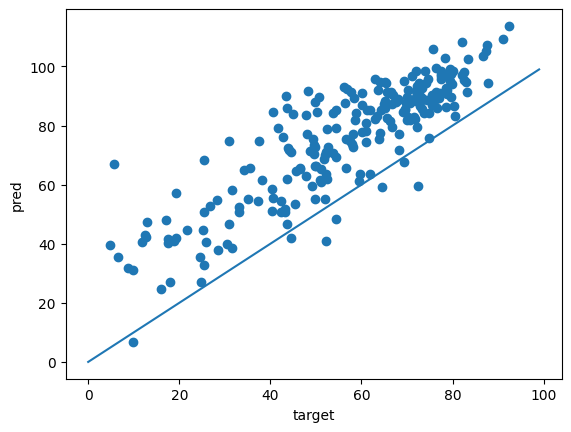

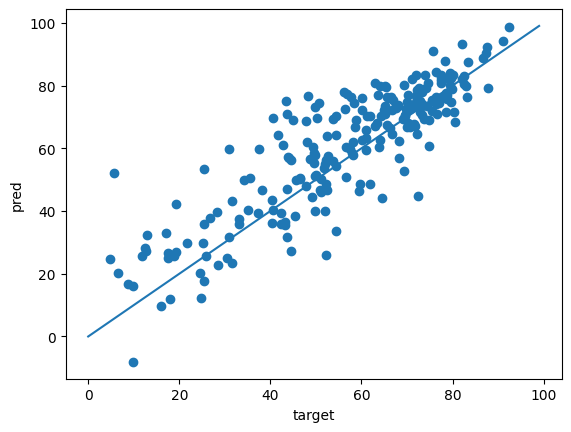

In [29]:
path = "/home/mrpaw/Documents/Projects/Python/PytorchTestRocm/tresOrg/TReS-main/saveclive_1_2021/sv/test_prediction_gt_1_2021_0 (Copy).csv"

import pandas as pd

# Wczytaj dane bez nagłówka i nadaj własne nazwy kolumn
df = pd.read_csv(path, header=None, names=["pred", "lbl"])

# Przekształć kolumny na listy
pred = df["pred"].tolist()
lbl = df["lbl"].tolist()

# Wyświetl dane
print("pred:", pred)
print("lbl:", lbl)

pred = torch.tensor(pred).unsqueeze(1)
lbl = torch.tensor(lbl).unsqueeze(1)

print(calc_PLCC(pred,lbl), " s:", stats.pearsonr(pred,lbl))
print(calc_SRCC(pred,lbl), " s:", stats.spearmanr(pred,lbl))
print(calc_MAE(pred, lbl))

plt.figure()
plt.scatter(lbl, pred)
plt.xlabel("target")
plt.ylabel("pred")
plt.plot(torch.arange(0,100,1))
# plt.scatter(lbl)


pred = pred - 15

print(calc_PLCC(pred,lbl), " s:", stats.pearsonr(pred,lbl))
print(calc_SRCC(pred,lbl), " s:", stats.spearmanr(pred,lbl))
print(calc_MAE(pred, lbl))

plt.figure()
plt.scatter(lbl, pred)
plt.xlabel("target")
plt.ylabel("pred")
plt.plot(torch.arange(0,100,1))
# plt.scatter(lbl)


In [ ]:
csvStr = """52.9272277832031	26.6666660308838
31.7711148452759	8.72251319885254
79.4442514038086	72.1272735595703
88.4284582519531	72.0392150878906
65.3324949645996	51.0928955078125
73.5579295349121	49.6172828674316
113.722817382813	92.4319534301758
108.252198791504	82.0734481811523
88.9775360107422	76.2642517089844
80.7523358154297	61.101188659668
84.2205125427246	73.6390533447266
82.2224955749512	71.7639770507813
72.8276203918457	58.1581916809082
70.0984687042236	52.0306129455566
89.4425871276855	58.3897438049316
77.7378587341309	60.2108116149902
94.2420909118652	74.2057113647461
103.701426086426	86.6021499633789
95.7509587097168	77.4866333007813
78.2849919128418	61.092716217041
90.4970442199707	75.5222244262695
97.5058122253418	79.5925903320313
77.6087536621094	64.0529403686523
98.3733203125	72.0602416992188
94.2889270019531	72.6464614868164
105.909012756348	75.7798767089844
40.7168835449219	25.9064331054688
84.699893951416	40.6722221374512
79.4384437561035	66.6647720336914
88.846649017334	68.0555572509766
75.4779499053955	63.8702697753906
54.3243647766113	37.338981628418
86.5840408325195	72.8333358764648
55.0565347290039	51.8994407653809
91.335055847168	66.5780334472656
88.3409220886231	65.0833358764648
81.8186361694336	70.0481948852539
84.2882556152344	53.7798728942871
61.5370561218262	38.235294342041
71.1217710113525	44.5620422363281
40.7401329803467	11.9002847671509
85.2733741760254	69.6153869628906
76.1959576416016	42.7950325012207
86.7919152832031	75.5824737548828
43.0753316497803	12.5562133789063
96.759630279541	77.4022979736328
92.6827410888672	78.5301208496094
41.0603619766235	52.1385536193848
85.260905456543	54.4259262084961
58.3425352478027	31.4974098205566
6.89152589917183	9.73885345458984
87.6400390625	69.6714248657227
109.314464569092	91.0780487060547
35.354847946167	6.52486181259155
88.5802476501465	74.3975143432617
39.9709627914429	30.537633895874
85.4130667114258	61.1656036376953
90.9893264770508	66.0144958496094
46.6442897033691	43.6686401367188
90.0457814025879	72.8428573608398
50.7722366333008	33.1403503417969
67.6230171203613	69.283332824707
85.2804586791992	61.8518524169922
63.7480368041992	61.9329261779785
92.2341801452637	56.8680572509766
91.6781915283203	71.8823547363281
87.9381198120117	72.5909118652344
50.7395677947998	25.437126159668
102.583070220947	83.4624252319336
107.349626922607	87.5820083618164
67.0252362060547	5.65868282318115
87.5494599914551	70.6318664550781
51.0789286804199	40.3898315429688
31.0398276519775	9.82758617401123
35.3746353912354	24.514123916626
84.0117234802246	44.9293479919434
37.8065436172485	28.5128211975098
63.0279501342774	47.8833351135254
87.6122796630859	56.3555564880371
66.3362414550781	50.0928955078125
83.0643374633789	70.3241729736328
97.1158110046387	82.1111145019531
95.7700834655762	74.5406723022461
87.2964576721192	66.6959075927734
70.3277103424072	49.5
46.6322092437744	30.9116020202637
40.1304177093506	17.519229888916
97.3461013793945	79.494384765625
89.545788269043	50.6684799194336
48.0344232940674	17.0055561065674
71.7498857879639	68.2171401977539
65.3076690673828	46.4134063720703
85.8532350158692	43.546875
92.9670277404785	72.489128112793
91.3129476928711	83.1770858764648
79.1323038482666	41.6809806823731
68.4729135894775	25.3314609527588
41.6355233383179	17.4874992370605
65.5531624603271	35.4835166931152
48.5303309631348	54.4047622680664
44.7627638244629	25.2378387451172
78.9020138549805	52.4293479919434
88.2240347290039	70.2954559326172
82.7405527496338	71.5062484741211
88.8132289123535	67.5052642822266
93.0458012390137	56.1573028564453
99.1142488098145	79.4378662109375
91.9192947387695	78.8193511962891
27.0959922409058	17.9569892883301
77.2924801635742	68.3112564086914
91.871759185791	63.5432090759277
52.2967659759522	33.0114936828613
42.3646303939819	12.7964067459106
95.4482659912109	82.6128997802734
63.6086806488037	52.1028556823731
88.0402616882324	49.8797454833984
90.8961494445801	60.0975608825684
85.962951965332	65.2634429931641
54.4656469345093	42.4121208190918
69.1933267211914	54.4594612121582
53.5542878723145	45.3351936340332
84.1297142028809	74.819206237793
74.5125848388672	61.0736846923828
102.750439147949	78.3313598632813
55.0376742553711	49.7958106994629
77.1296965026856	48.0200004577637
85.8455616760254	76.6619033813477
27.1147491836548	24.8711338043213
82.2217944335937	63.0452270507813
61.0428214263916	51.173267364502
65.6225372314453	46.4157295227051
87.2704536437988	65.0059204101563
59.6443444061279	72.4574432373047
85.754415512085	73.2793273925781
72.7966387939453	49.8076934814453
39.6322582626343	4.8461537361145
42.013900718689	19.1736850738525
95.0777085876465	79.4166641235352
89.7728373718262	70.073616027832
93.719986114502	73.1847839355469
91.3825503540039	76.2762451171875
68.7907515716553	51.8306884765625
74.7194309997559	57.5254249572754
70.7967608642578	53.8333320617676
32.682947769165	25.4715900421143
81.9330085754395	58.6432151794434
83.5806715393066	47.7976875305176
81.7463095092773	70.6449737548828
88.5808375549316	68.1116714477539
54.7513715744019	28.1758251190186
84.5517919921875	50.1882362365723
63.6143414306641	59.6607131958008
89.4267912292481	77.1139221191406
57.0790273284912	19.3764038085938
64.7245837402344	45.523811340332
92.8161889648438	73.2048187255859
91.2063458251953	57.721923828125
40.7865279006958	18.7848834991455
73.5960942840576	57.9261360168457
75.6574401092529	74.787712097168
87.077230682373	60.0160446166992
90.243391418457	66.9428558349609
96.9219622802734	71.0285720825195
94.2618182373047	87.8478240966797
83.1069906616211	63.3351936340332
89.9383340454102	43.4316940307617
94.7096250915527	65.0696487426758
24.8342748260498	16.0268459320068
51.6356395721436	43.2736320495606
50.630115737915	43.2024536132813
85.2291459655762	64.3296737670898
59.3764642333984	49.0994758605957
94.8478475952148	64.1695938110352
89.7942977905273	71.9005813598633
72.3178468322754	43.8820495605469
44.7244416427612	21.8011054992676
74.8919016265869	30.9360466003418
58.4341737365723	40.3966484069824
105.373296661377	87.3710708618164
74.8210680389404	37.4011001586914
47.3022983551025	12.8993711471558
85.4971312713623	69.6470565795898
94.0460496520996	79.7675704956055
82.4474867248535	65.5325469970703
91.6808206176758	48.2732925415039
97.2436514282227	78.7961807250977
87.8758177185059	67.5869598388672
94.8647230529785	82.9107131958008
71.7485743713379	44.1720428466797
72.6332760620117	52.6824645996094
91.1975454711914	65.551139831543
98.4203266906738	80.1005554199219
50.8389730834961	42.4226188659668
86.401286315918	78.6287460327148
38.5176192474365	31.6408843994141
75.5148764038086	49.3015861511231
95.0810040283203	69.3782348632813
98.5011857604981	77.4260330200195
84.1530583190918	58.7979278564453
77.0225175476074	58.2160797119141
95.6789111328125	63.0714302062988
55.173999786377	35.1036567687988
59.2155828094482	64.6102600097656
99.4037188720703	76.2562789916992
61.934225692749	43.7027015686035
71.1271817016602	52.1947364807129
86.6300998687744	80.3618087768555
88.3345300292969	70.3687515258789
61.2394403076172	59.4096374511719
75.5623374938965	56.6777763366699
66.2922890472412	49.8730163574219
98.0766230773926	82.5133666992188
84.4373707580566	69.18408203125
61.6059017944336	50.9508209228516
91.1777207946777	77.1999969482422
55.3482329559326	40.6723175048828
81.4360028076172	66.212287902832
89.661174621582	79.7025604248047
42.1050818252564	44.4461212158203
64.8486679840088	34.1234550476074
65.7317933654785	56.6959075927734
94.5584954833984	65.4550018310547
90.6877699279785	78.6789474487305
98.3264474487305	73.9455413818359
71.4322240447998	48.803466796875
89.2008102416992	73.3081359863281
92.1280490112305	70.2865829467773
83.3204192352295	80.5
79.2743434906006	54.421875
93.5042144775391	72.1049346923828
61.8084909057617	52.4285697937012
97.5658865356445	77.3576126098633
"""

pred: [46.571319580078125, 48.342918395996094, 63.73596954345703, 73.98297882080078, 58.65848159790039, 58.6131591796875, 67.57366180419922, 76.49208068847656, 71.79544067382812, 60.490379333496094, 68.37859344482422, 70.99800872802734, 60.624473571777344, 52.59552001953125, 65.70413970947266, 53.71466827392578, 69.0305404663086, 75.35368347167969, 74.05436706542969, 71.33552551269531, 71.72470092773438, 73.42167663574219, 65.11841583251953, 56.70738983154297, 66.52520751953125, 80.53978729248047, 55.36375045776367, 48.38447570800781, 49.00526428222656, 65.36508178710938, 71.23937225341797, 57.23314666748047, 65.16307067871094, 51.00286865234375, 61.007545471191406, 69.53598022460938, 68.00684356689453, 70.10960388183594, 59.58724594116211, 49.48064804077149, 51.61602783203125, 68.89974212646484, 56.707462310791016, 69.48600006103516, 47.48284912109375, 69.53376007080078, 67.4617691040039, 34.923919677734375, 71.67021179199219, 53.48646926879883, 40.53000259399414, 71.0618667602539, 68

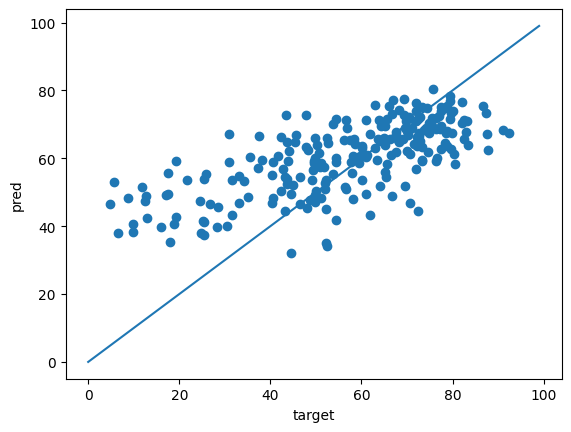

In [5]:
path = "/home/mrpaw/Documents/Projects/Python/PytorchTestRocm/tresOrg/TReS-main/saveclive_1_2021/sv/test_prediction_gt_1_2021_0.csv"

import pandas as pd

def plotres(path):

    # Wczytaj dane bez nagłówka i nadaj własne nazwy kolumn
    df = pd.read_csv(path, header=None, names=["pred", "lbl"])

    # Przekształć kolumny na listy
    pred = df["pred"].tolist()
    lbl = df["lbl"].tolist()

    # Wyświetl dane
    print("pred:", pred)
    print("lbl:", lbl)

    pred = torch.tensor(pred).unsqueeze(1)
    lbl = torch.tensor(lbl).unsqueeze(1)

    print(calc_PLCC(pred,lbl), " s:", stats.pearsonr(pred,lbl))
    print(calc_SRCC(pred,lbl), " s:", stats.spearmanr(pred,lbl))
    print(calc_MAE(pred, lbl))

    plt.figure()
    plt.scatter(lbl, pred)
    plt.xlabel("target")
    plt.ylabel("pred")
    plt.plot(torch.arange(0,100,1))

plotres(path)

pred: [75.41850875854492, 89.61643356323242, 74.05462692260743, 41.36652637481689, 65.67024452209472, 83.22228881835937, 50.78192710876465, 86.48059112548827, 29.240345287323, 79.96723861694336, 88.88108093261718, 60.9025057220459, 68.66803527832032, 62.07397438049316, 54.39421379089355, 87.70503875732422, 30.29130714416504, 83.31407684326172, 87.74843643188477, 91.18645263671876, 38.69292785644532, 81.00213775634765, 61.27127750396728, 88.16932281494141, 79.57650299072266, 66.05558959960938, 90.6977507019043, 59.136150436401365, 87.9850439453125, 97.4019857788086, 98.54383697509766, 80.0649446105957, 78.31738975524902, 34.424907264709475, 73.36571975708007, 95.06418075561524, 38.7963338470459, 64.46664894104003, 79.68862915039062, 91.31560203552246, 27.768711395263672, 64.82533752441407, 98.56763442993164, 50.99166854858399, 90.25031173706054, 93.94528671264648, 86.54227996826172, 95.08569320678713, 71.63398490905762, 77.78904304504394, 38.24722259521484, 90.75602951049804, 59.8224892

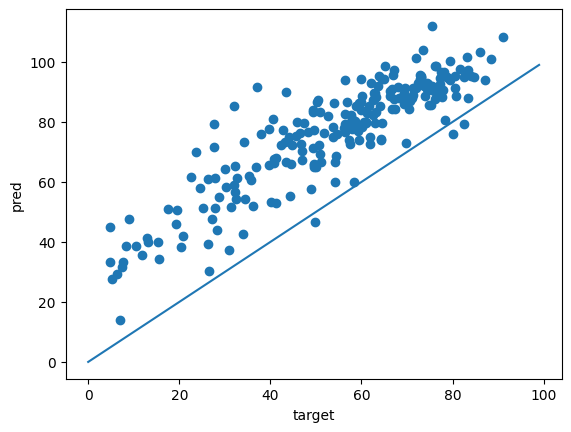

In [6]:
plotres("/home/mrpaw/Documents/Projects/Python/PytorchTestRocm/magisterka/saveclive_1_2021/sv/test_prediction_gt_1_2021_0.csv")

plcc
tensor(1.)  s: PearsonRResult(statistic=array([1.], dtype=float32), pvalue=array([0.]))
tensor(1.)  s: PearsonRResult(statistic=array([1.], dtype=float32), pvalue=array([0.]))
tensor(0.9712)  s: PearsonRResult(statistic=array([0.97115266], dtype=float32), pvalue=array([1.1833709e-12]))
tensor(-1.)  s: PearsonRResult(statistic=array([-1.], dtype=float32), pvalue=array([0.]))
scrr
tensor(1.)  s: SignificanceResult(statistic=np.float64(1.0), pvalue=np.float64(0.0))
tensor(1.)  s: SignificanceResult(statistic=np.float64(1.0), pvalue=np.float64(0.0))
tensor(0.9549)  s: SignificanceResult(statistic=np.float64(0.9548872180451128), pvalue=np.float64(6.237876047979233e-11))
tensor(-1.)  s: SignificanceResult(statistic=np.float64(-1.0), pvalue=np.float64(0.0))


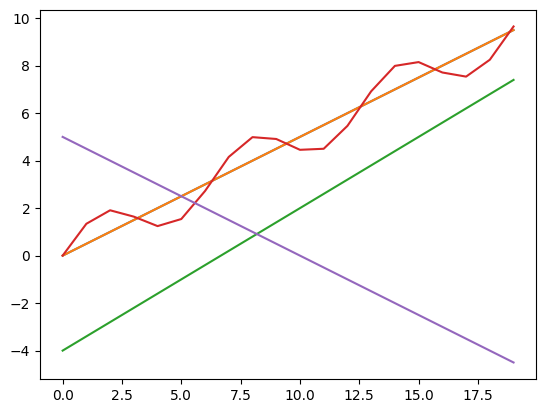

In [4]:
x = torch.arange(0,20).unsqueeze(1)

# print(x)
# print(x.squeeze(1))
# print(x.view(-1))
# x = torch.arange(0,20)
t1 = x * 0.5
p1 = x * 0.5
rp1= x * -0.5 + 5


p2 = x * 0.6 - 4

p3 = p1 + x.sin()

print("plcc")
print(calc_PLCC(p1,t1), " s:", stats.pearsonr(p1,t1))
print(calc_PLCC(p2,t1), " s:", stats.pearsonr(p2,t1))
print(calc_PLCC(p3,t1), " s:", stats.pearsonr(p3,t1))
print(calc_PLCC(rp1,t1), " s:", stats.pearsonr(rp1,t1))
print("scrr")
print(calc_SRCC(p1,t1), " s:", stats.spearmanr(p1,t1))
print(calc_SRCC(p2,t1), " s:", stats.spearmanr(p2,t1))
print(calc_SRCC(p3,t1), " s:", stats.spearmanr(p3,t1))
print(calc_SRCC(rp1,t1), " s:", stats.spearmanr(rp1,t1))
# print("calc_CosineSim")
# print(calc_CosineSim(p1,t1))
# print(calc_CosineSim(p2,t1))
# print(calc_CosineSim(p3,t1))
# print(calc_CosineSim(rp1,t1))
# print("calc_MAE")
# print(calc_MAE(p1,t1))
# print(calc_MAE(p2,t1))
# print(calc_MAE(p3,t1))
# print(calc_MAE(rp1,t1))

plt.figure()
plt.plot(x,t1)
plt.plot(x,p1)
plt.plot(x,p2)
plt.plot(x,p3)
plt.plot(x,rp1)

In [25]:
b = torch.zeros((0)).unsqueeze(1)
b2 = torch.rand((4,1))
print(b)
print(b2)
print(b.shape)
print(b2.shape)
b1 = torch.cat((b,torch.rand((4,1))),dim=0)
print(b1)
b1 = torch.cat((b1,torch.rand((4,1))),dim=0)
print(b1)

tensor([], size=(0, 1))
tensor([[0.6980],
        [0.8527],
        [0.7633],
        [0.9361]])
torch.Size([0, 1])
torch.Size([4, 1])
tensor([[0.3964],
        [0.6242],
        [0.3537],
        [0.2498]])
tensor([[0.3964],
        [0.6242],
        [0.3537],
        [0.2498],
        [0.2423],
        [0.7133],
        [0.3272],
        [0.6000]])


In [33]:
x = torch.tensor([50.0, 20.0, 40.0])
print(x)
print(x.argsort()) # tensor([1, 2, 0])
print(x.argsort().argsort()) # tensor([2, 0, 1])

tensor([50., 20., 40.])
tensor([1, 2, 0])
tensor([2, 0, 1])


tensor(0.8894)
tensor(0.8617)
tensor(0.1297)
tensor(0.8633)
tensor(0.7820)
tensor(0.2261)


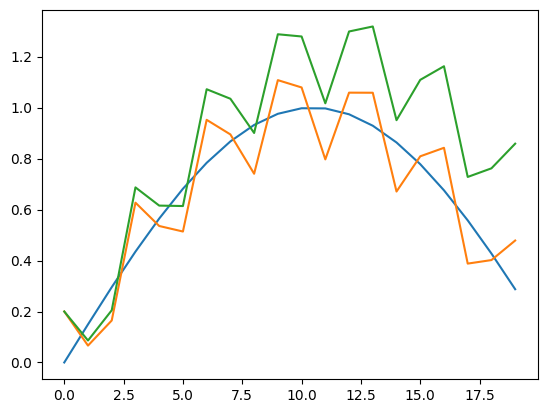

In [23]:
x = torch.arange(0,20).unsqueeze(1)

t1 = torch.sin(x * 0.15)
t2 = torch.sin(x * 0.15) + torch.cos(x*2) * 0.2
t3 = torch.sin(x * 0.15) + torch.cos(x*2) * 0.2 + x * 0.02



print(calc_PLCC(t2,t1))
print(calc_SRCC(t2,t1))
print(calc_MAE(t2, t1))
print(calc_PLCC(t3,t1))
print(calc_SRCC(t3,t1))
print(calc_MAE(t3, t1))

plt.figure()
plt.plot(x,t1)
plt.plot(x,t2)
plt.plot(x,t3)

In [14]:
a = torch.tensor([1,2,3,4,1,2,3,4], dtype=torch.float32)
a = a.unsqueeze(1)
print(a)
print(a.view(-1,4))
print(a.view(4,-1))
print(a.view(-1,4).mean(0))


tensor([[1.],
        [2.],
        [3.],
        [4.],
        [1.],
        [2.],
        [3.],
        [4.]])
tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.]])
tensor([[1., 2.],
        [3., 4.],
        [1., 2.],
        [3., 4.]])
tensor([1., 2., 3., 4.])


In [17]:
m = a.view(-1,4).mean(0)
m.tolist()

[1.0, 2.0, 3.0, 4.0]